In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
default=pd.read_csv('kc_house_data.csv')

In [7]:
default

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [11]:
default=default[['price','sqft_living']]

In [12]:
default

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680
...,...,...
21608,360000.0,1530
21609,400000.0,2310
21610,402101.0,1020
21611,400000.0,1600


In [13]:
default.shape

(21613, 2)

In [14]:
default.dropna()

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680
...,...,...
21608,360000.0,1530
21609,400000.0,2310
21610,402101.0,1020
21611,400000.0,1600


In [15]:
from sklearn.model_selection import train_test_split

In [48]:
x=default[['price']]
y=default[['sqft_living']]


In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [55]:
x_train

,price
10156,408000.0
15242,265000.0
1227,211000.0
1756,850000.0
7785,210000.0
...,...
19370,199900.0
21282,706000.0
4275,1275000.0
2145,415000.0


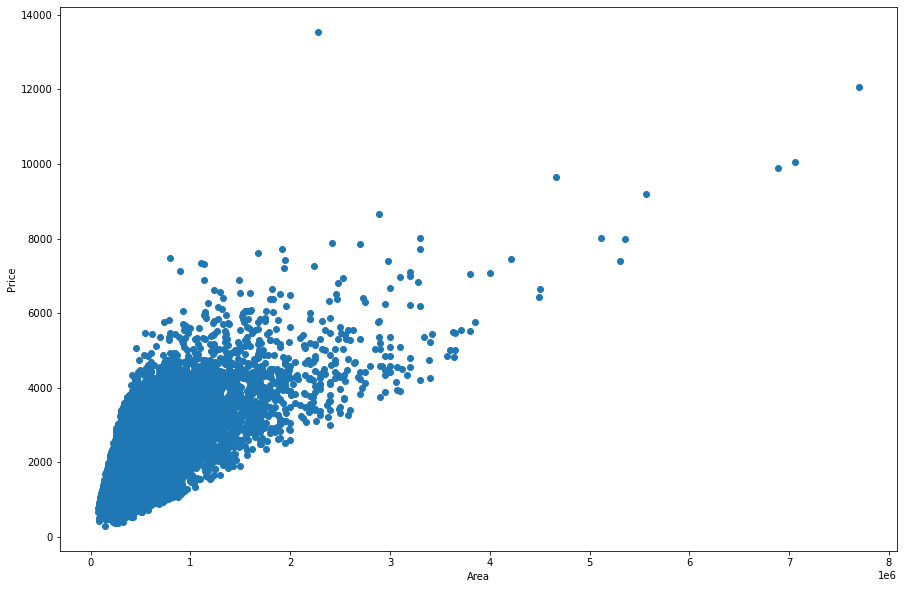

In [56]:
plt.figure(figsize=(15,10))
plt.xlabel("Area")
plt.ylabel("Price")
plt.scatter(x,y)


In [57]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [58]:
lr.fit(x_train,y_train)


LinearRegression()

In [71]:
y_pred=lr.predict(x_test)

In [72]:
y_pred

array([[1467.02457456],
       [2413.41732502],
       [3128.38243237],
       ...,
       [2655.8138467 ],
       [1811.7856705 ],
       [1485.68387515]])

In [73]:
m=lr.coef_



In [74]:
lr.intercept_

array([1140.39962125])

In [75]:
lr.predict([[52]])

array([[1140.49030197]])

In [76]:
52*0.00174386+1140.39962125

1140.49030197

ValueError: If using all scalar values, you must pass an index

In [83]:
import pickle

In [85]:
pickle.dump(lr,open("houseprice.sav",'wb'))

In [ ]:
area_df=pd.